In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter
import string

In [2]:
### Read our train data into a dataframe
texts = pd.read_csv("train.csv", encoding = 'latin-1')

# look at the first few rows of texts
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
# read our test data into a dataframe 
test = pd.read_csv("test.csv", encoding = 'latin-1')

# look at the first few rows of test
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [4]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)


In [5]:
# Get parts-of-speech for each author using 
partOfSpeech = {}

for key, value in token_dict.items():
    
    partOfSpeech[key] = nltk.pos_tag(value)

partOfSpeech

{'EAP': [('this', 'DT'),
  ('process', 'NN'),
  (',', ','),
  ('however', 'RB'),
  (',', ','),
  ('afforded', 'VBD'),
  ('me', 'PRP'),
  ('no', 'DT'),
  ('means', 'NNS'),
  ('of', 'IN'),
  ('ascertaining', 'VBG'),
  ('the', 'DT'),
  ('dimensions', 'NNS'),
  ('of', 'IN'),
  ('my', 'PRP$'),
  ('dungeon', 'NN'),
  (';', ':'),
  ('as', 'IN'),
  ('i', 'NN'),
  ('might', 'MD'),
  ('make', 'VB'),
  ('its', 'PRP$'),
  ('circuit', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('return', 'NN'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('point', 'NN'),
  ('whence', 'NN'),
  ('i', 'NN'),
  ('set', 'VBN'),
  ('out', 'RP'),
  (',', ','),
  ('without', 'IN'),
  ('being', 'VBG'),
  ('aware', 'JJ'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('fact', 'NN'),
  (';', ':'),
  ('so', 'RB'),
  ('perfectly', 'RB'),
  ('uniform', 'JJ'),
  ('seemed', 'VBD'),
  ('the', 'DT'),
  ('wall', 'NN'),
  ('.', '.'),
  ('in', 'IN'),
  ('his', 'PRP$'),
  ('left', 'JJ'),
  ('hand', 'NN'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('gold', 'JJ'),
  (

In [6]:
# Count the the number of parts of speech for each author 
# create an empty dictonary to hold all of the counts
partOfSpeechCounts = {}
for name in partOfSpeech: 
     partOfSpeechCounts[name] = Counter(elem[1] for elem in partOfSpeech[name])
        
partOfSpeechCounts

{'EAP': Counter({"''": 39,
          ',': 432,
          '.': 195,
          ':': 44,
          'CC': 192,
          'CD': 26,
          'DT': 563,
          'EX': 11,
          'FW': 5,
          'IN': 675,
          'JJ': 366,
          'JJR': 9,
          'JJS': 11,
          'MD': 81,
          'NN': 905,
          'NNP': 6,
          'NNS': 203,
          'PDT': 10,
          'POS': 7,
          'PRP': 223,
          'PRP$': 118,
          'RB': 306,
          'RBR': 12,
          'RBS': 4,
          'RP': 22,
          'TO': 123,
          'UH': 1,
          'VB': 176,
          'VBD': 267,
          'VBG': 72,
          'VBN': 174,
          'VBP': 58,
          'VBZ': 61,
          'WDT': 32,
          'WP': 20,
          'WRB': 16,
          '``': 40}),
 'HPL': Counter({"''": 36,
          ',': 254,
          '.': 169,
          ':': 30,
          'CC': 216,
          'CD': 18,
          'DT': 489,
          'EX': 15,
          'FW': 1,
          'IN': 557,
          'JJ': 430

In [7]:
# visualise the above in a dataframe
speech_parts_df = pd.DataFrame(partOfSpeechCounts)
speech_parts_df
speech_parts_df.index

Index(['''', ',', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR',
       'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB',
       'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
       'WDT', 'WP', 'WP$', 'WRB', '``'],
      dtype='object')

In [8]:
# from the string library, pull the list of punctuations
punctuation = set(string.punctuation)
# Add in the missing punctuations 
punctuation.add('``')
punctuation.add('\'\'')
punctuation

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 '{',
 '|',
 '}',
 '~'}

In [9]:
# iterate through the rows of speech_parts_df and drop the rows if the index is not punctuation mark
for index,row in speech_parts_df.iterrows():
    if(index not in punctuation):
        speech_parts_df = speech_parts_df.drop(index)
        
speech_parts_df
            

,EAP,HPL,MWS
'',39.0,36.0,20.0
",",432.0,254.0,286.0
.,195.0,169.0,161.0
:,44.0,30.0,82.0
``,40.0,7.0,22.0


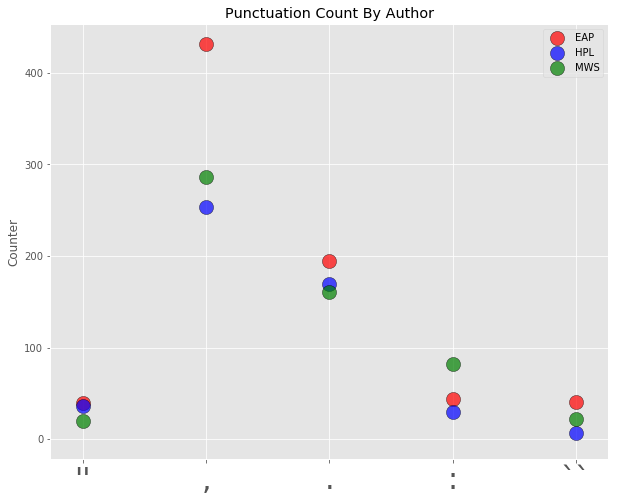

In [10]:
# scatter plot for count of punctuation types by author
xticks = ["''",',','.',':','``']
x_axis = np.arange(0,len(speech_parts_df),1)

y_EAP_axis = speech_parts_df['EAP']
y_HPL_axis = speech_parts_df["HPL"]
y_MWS_axis = speech_parts_df["MWS"]

plt.figure(figsize=(10,8))

EAP_handle = plt.scatter(x=x_axis,y=y_EAP_axis,marker='o',color='r',edgecolors='black',s=200,alpha=0.7,label="EAP") 
HPL_handle = plt.scatter(x=x_axis,y=y_HPL_axis,marker='o',color='b',edgecolors='black',s=200,alpha=0.7,label="HPL") 
MWS_handle = plt.scatter(x=x_axis,y=y_MWS_axis,marker='o',color='g',edgecolors='black',s=200,alpha=0.7,label="MWS") 

plt.legend(handles=[EAP_handle,HPL_handle,MWS_handle],loc='best')

plt.xticks(x_axis,xticks,fontsize=30)
plt.ylabel("Counter")
plt.title("Punctuation Count By Author")

plt.show()
